## Project 3

## <em>Machine Learning Clasification, Inference, and more on Sampling</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

## **Project 3 is composed of four questions in individual notebooks. This is done so that you can import packages for each question separately. Please combine the PDFs of the four notebooks with a PDF combiner (something like [this](https://combinepdf.com/) ) before submitting to bcourses.**

## **NOTE1: Both Physics 188 and 288 will have the same project for Project 3.**

## **NOTE2: Due to grade submission deadlines set by the university, Project 3 is STRICTLY due 11:59pm, Friday 12/15.**


***
### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports

In [ ]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

***

## Problem 1 - Using Keras - MNIST

The goal of this notebook is to introduce deep neural networks (DNNs) and convolutional neural networks (CNNs) using the high-level Keras package and to become familiar with how to choose its architecture, cost function, and optimizer in Keras. We will also learn how to train neural networks.

We will once again work with the MNIST dataset of hand written digits introduced in earlier HW. The goal is to find a statistical model which recognizes and distinguishes between the ten handwritten digits (0-9).

The MNIST dataset comprises handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ nuances of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic classification task.

In this Notebook, we show how to use the Keras python package to tackle the MNIST problem with the help of deep neural networks.

## Creating DNNs with Keras

Constructing a Deep Neural Network to solve ML problems is a multiple-stage process. Quite generally, one can identify the key steps as follows:

* ***step 1:*** Load and process the data
* ***step 2:*** Define the model and its architecture
* ***step 3:*** Choose the optimizer and the cost function
* ***step 4:*** Train the model
* ***step 5:*** Evaluate the model performance on the *unseen* test data
* ***step 6:*** Modify the hyperparameters to optimize performance for the specific data set

We would like to emphasize that, while it is always possible to view steps 1-5 as independent of the particular task we are trying to solve, it is only when they are put together in ***step 6*** that the real gain of using Deep Learning is revealed, compared to less sophisticated methods such as the regression models. With this remark in mind, we shall focus predominantly on steps 1-5 below. We show how one can use grid search methods to find optimal hyperparameters in ***step 6***.

### Step 1: Load and Process the Data

Keras knows to download automatically the MNIST data from the web. All we need to do is import the `mnist` module and use the `load_data()` class, and it will create the training and test data sets or us.

The MNIST set has pre-defined test and training sets, in order to facilitate the comparison of the performance of different models on the data.

Once we have loaded the data, we need to format it in the correct shape ($({\mathrm{N_{samples}}}, {\mathrm{N_{features}}})$).

The size of each sample, i.e. the number of bare features used is N_features (whis is 784 because we have a $28 \times 28$ pixel grid), while the number of potential classification categories is "num_classes" (which is 10, number of digits).

Each pixel
contains a greyscale value quantified by an integer between
0 and 255. To standardize the dataset, we normalize
the input data in the interval [0, 1].

In [ ]:
!pip install tensorflow~=2.10.0
!pip install scikeras
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 103.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 64.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator

In [ ]:
import sklearn
import tensorflow.keras as keras
# suppress tensorflow compilation warnings
import os
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from tensorflow.keras.datasets import mnist

# input image dimensions
num_classes = 10 # 10 digits

img_rows, img_cols = 28, 28 # number of pixels

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train[:40000]
Y_train = Y_train[:40000]

# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


<span style="color:blue"> <i> 1. Make a plot of one MNIST digit (2D plot using X data - make sure to reshape it into a $28 \times 28$ matrix) and label it (which digit does it correspond to?). </i></span> <br>

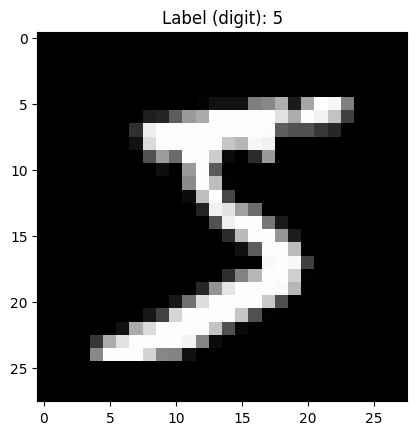

In [ ]:
plt.imshow(X_train[0].reshape((28,-1)), cmap='gray')
plt.title(f'Label (digit): {(Y_train[0])}')
plt.show()

Last, we cast the label vectors $y$ to binary class matrices (a.k.a. one-hot format).

In [ ]:
# convert class vectors to binary class matrices

print("before conversion - ")
print("y vector : ", Y_train[0:10])

Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)

print("after conversion - ")
print("y vector : ", Y_train[0:10])

before conversion - 
y vector :  [5 0 4 1 9 2 1 3 1 4]
after conversion - 
y vector :  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Here in this template, we use 40000 training samples and 10000 test samples. Remember that we preprocessed data into the shape $({\mathrm{N_{samples}}}, {\mathrm{N_{features}}})$.

In [ ]:
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 784)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


### Step 2: Define the Neural Net and its Architecture

We can now move on to construct our deep neural net. We shall use Keras's `Sequential()` class to instantiate a model, and will add different deep layers one by one.

Let us create an instance of Keras' `Sequential()` class, called `model`. As the name suggests, this class allows us to build DNNs layer by layer. (https://keras.io/getting-started/sequential-model-guide/)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# instantiate model
model = Sequential()

We use the `add()` method to attach layers to our model. For the purposes of our introductory example, it suffices to focus on `Dense` layers for simplicity. (https://keras.io/layers/core/) Every `Dense()` layer accepts as its first required argument an integer which specifies the number of neurons. The type of activation function for the layer is defined using the `activation` optional argument, the input of which is the name of the activation function in `string` format. Examples include `relu`, `tanh`, `elu`, `sigmoid`, `softmax`.

In order for our DNN to work properly, we have to make sure that the numbers of input and output neurons for each layer match. Therefore, we specify the shape of the input in the first layer of the model explicitly using the optional argument `input_shape=(N_features,)`. The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically. Hence, we only need to specify the size of the softmax output layer to match the number of categories.

First, add a `Dense` layer with 400 output neurons and `relu` activation function.

In [ ]:
model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))

Add another layer with 100 output neurons. Then, we will apply "dropout," a regularization scheme that has been widely adopted in the neural networks literature: during the training procedure neurons
are randomly “dropped out” of the neural network with some
probability $p$ giving rise to a thinned network. It prevents overfitting by reducing spurious correlations between neurons within the network by introducing
a randomization procedure.

In [ ]:
model.add(Dense(100, activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))

Lastly, we need to add a soft-max layer since we have a multi-class output.

In [ ]:
model.add(Dense(num_classes, activation='softmax'))

### Step 3: Choose the Optimizer and the Cost Function

Next, we choose the loss function according to which to train the DNN. For classification problems, this is the cross entropy, and since the output data was cast in categorical form, we choose the `categorical_crossentropy` defined in Keras' `losses` module. Depending on the problem of interest one can pick any other suitable loss function. To optimize the weights of the net, we choose SGD. This algorithm is already available to use under Keras' `optimizers` module (https://keras.io/optimizers/), but we could use `Adam()` or any other built-in one as well. The parameters for the optimizer, such as `lr` (learning rate) or `momentum` are passed using the corresponding optional arguments of the `SGD()` function.

While the loss function and the optimizer are essential for the training procedure, to test the performance of the model one may want to look at a particular `metric` of performance. For instance, in categorical tasks one typically looks at their `accuracy`, which is defined as the percentage of correctly classified data points.

To complete the definition of our model, we use the `compile()` method, with optional arguments for the `optimizer`, `loss`, and the validation `metric` as follows:

In [ ]:
# compile the model
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])


### Step 4: Train the model

We train our DNN in minibatches. Shuffling the training data during training improves stability of the model. Thus, we train over a number of training epochs.

(The number of epochs is the number of complete passes through the training dataset, and the batch size is a number of samples propagated through the network before the model is updated.)

Training the DNN is a one-liner using the `fit()` method of the `Sequential` class. The first two required arguments are the training input and output data. As optional arguments, we specify the mini-`batch_size`, the number of training `epochs`, and the test or validation data. To monitor the training procedure for every epoch, we set `verbose=True`.

Let us set `batch_size` = 64 and `epochs` = 10.

In [ ]:
# training parameters
batch_size = 64
epochs = 10

# train DNN and store training info in history
history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 1.2364 - accuracy: 0.6296 - val_loss: 0.5333 - val_accuracy: 0.8804
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6082 - accuracy: 0.8240 - val_loss: 0.3696 - val_accuracy: 0.9058
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 0.4864 - accuracy: 0.8600 - val_loss: 0.3115 - val_accuracy: 0.9148
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4254 - accuracy: 0.8777 - val_loss: 0.2826 - val_accuracy: 0.9213
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3846 - accuracy: 0.8907 - val_loss: 0.2601 - val_accuracy: 0.9260
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3531 - accuracy: 0.8994 - val_loss: 0.2419 - val_accuracy: 0.9295
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3292 - accuracy: 0.9065 - val_loss: 0.2281 - val_accuracy: 0.9337
Epoch

### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

Next, we evaluate the model and read of the loss on the test data, and its accuracy using the `evaluate()` method.

313/313 [==============================] - 1s 3ms/step - loss: 0.1943 - accuracy: 0.9428
Test loss: 0.1943226009607315
Test accuracy: 0.942799985408783


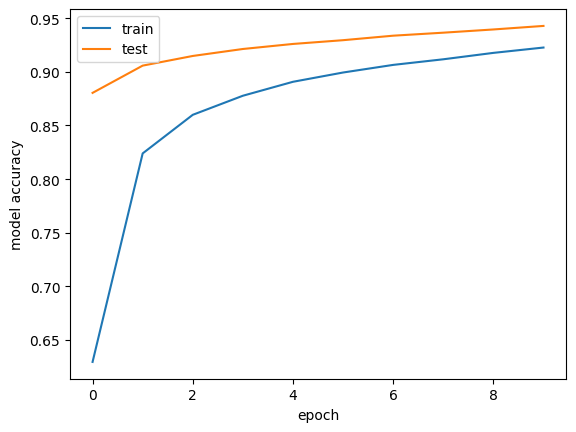

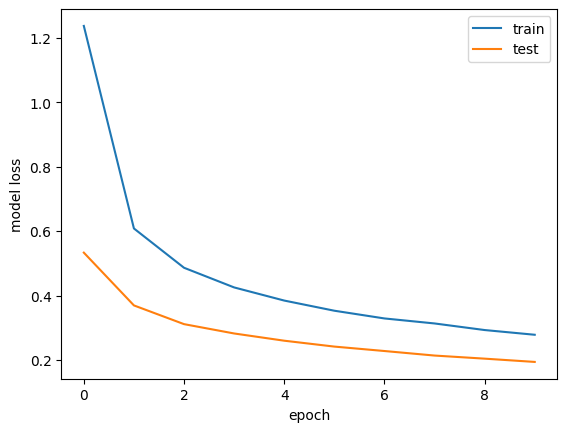

In [ ]:
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Step 6: Modify the Hyperparameters to Optimize Performance of the Model

Last, we show how to use the grid search option of scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to optimize the
hyperparameters of our model.

First, define a function for crating a DNN:

In [ ]:
def create_DNN(optimizer=tf.keras.optimizers.Adam()):
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

With epochs = 1 and batch_size = 64, do grid search over the following optimization schemes: ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'].

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(model=create_DNN,
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(model__optimizer=optimizer)
# IMPORTANT: Note that the syntax to pass an argument to the create_DNN function requires
# model__ to be added before the parameter name.

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

625/625 [==============================] - 6s 9ms/step - loss: 0.3743 - accuracy: 0.8910


Show the mean test score of all optimization schemes and determine which scheme gives the best accuracy.

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948125 using {'model__optimizer': 'Nadam'}
0.849200 (0.003856) with: {'model__optimizer': 'SGD'}
0.946825 (0.002896) with: {'model__optimizer': 'RMSprop'}
0.717900 (0.024026) with: {'model__optimizer': 'Adagrad'}
0.139475 (0.015803) with: {'model__optimizer': 'Adadelta'}
0.947300 (0.002922) with: {'model__optimizer': 'Adam'}
0.923375 (0.004062) with: {'model__optimizer': 'Adamax'}
0.948125 (0.002259) with: {'model__optimizer': 'Nadam'}


<span style="color:blue"> <i> 2. Now, create a DNN with one Dense layer having 200 output neurons, but let the activation function be an argument. Do the grid search over any 5 different activation functions from https://keras.io/activations/. Let epochs = 1, batches = 64, p_dropout=0.5, and optimizer=tf.keras.optimizers.Adam().  Make sure to print the mean test score of each case and determine which activation functions gives the best accuracy. </i></span> <br>


In [ ]:
def create_DNN(activation='relu'):
    model = Sequential()
    model.add(Dense(200,input_shape=(img_rows*img_cols,), activation=activation))
    # model.add(Dense(100, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(model=create_DNN,
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the activation, see `compile_model()`
activation = ['relu', 'sigmoid', 'tanh', 'elu', 'leaky_relu']
# define parameter dictionary
param_grid = dict(model__activation=activation)
# IMPORTANT: Note that the syntax to pass an argument to the create_DNN function requires
# model__ to be added before the parameter name.

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

625/625 [==============================] - 3s 4ms/step - loss: 0.4391 - accuracy: 0.8706


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.931700 using {'model__activation': 'relu'}
0.931700 (0.002194) with: {'model__activation': 'relu'}
0.896100 (0.001868) with: {'model__activation': 'sigmoid'}
0.910100 (0.005367) with: {'model__activation': 'tanh'}
0.912675 (0.004086) with: {'model__activation': 'elu'}
0.923025 (0.003003) with: {'model__activation': 'leaky_relu'}


<span style="color:blue"> <i> 3. Now, do the grid search over different combination of batch sizes (10, 30, 50, 100) and number of epochs (1, 2, 5). Use the activation function that gave you the highest accuracy in Part 2. Make sure to print the mean test score of each case and determine which combination of batch size and number of epochs gives the best accuracy. Here, you have a freedom to create your own DNN (assume an arbitrary number of Dense layers, optimization scheme, etc).  </i></span> <br>

Hint: To do the grid search over both batch_size and epochs, you can do:

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_DNN():
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

model_gridsearch = KerasClassifier(model=create_DNN, verbose=1)

# list of allowed optional arguments, see `compile_model()`
batch_size = [10, 30, 50, 100]
epochs = [1, 2, 5]
# define parameter dictionary
param_grid = dict(batch_size=batch_size, epochs=epochs)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

1000/1000 [==============================] - 2s 2ms/step
Epoch 1/2
3000/3000 [==============================] - 9s 3ms/step - loss: 0.3408 - accuracy: 0.8981
Epoch 2/2
1000/1000 [==============================] - 2s 2ms/step
Epoch 1/2
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3424 - accuracy: 0.8983
Epoch 2/2
1000/1000 [==============================] - 2s 2ms/step
Epoch 1/2
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3454 - accuracy: 0.8978
Epoch 2/2
1000/1000 [==============================] - 2s 2ms/step
Epoch 1/2
3000/3000 [==============================] - 12s 4ms/step - loss: 0.3356 - accuracy: 0.9002
Epoch 2/2
1000/1000 [==============================] - 3s 3ms/step
Epoch 1/5
3000/3000 [==============================] - 12s 4ms/step - loss: 0.3460 - accuracy: 0.8984
Epoch 2/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1633 - accuracy: 0.9532
Epoch 3/5
3000/3000 [==============================] - 15s 5ms/s

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.970775 using {'batch_size': 50, 'epochs': 5}
0.950700 (0.005350) with: {'batch_size': 10, 'epochs': 1}
0.963050 (0.000976) with: {'batch_size': 10, 'epochs': 2}
0.970625 (0.001192) with: {'batch_size': 10, 'epochs': 5}
0.951800 (0.002303) with: {'batch_size': 30, 'epochs': 1}
0.963550 (0.001699) with: {'batch_size': 30, 'epochs': 2}
0.970300 (0.002115) with: {'batch_size': 30, 'epochs': 5}
0.949100 (0.002622) with: {'batch_size': 50, 'epochs': 1}
0.962875 (0.002327) with: {'batch_size': 50, 'epochs': 2}
0.970775 (0.001372) with: {'batch_size': 50, 'epochs': 5}
0.942975 (0.002935) with: {'batch_size': 100, 'epochs': 1}
0.959625 (0.001863) with: {'batch_size': 100, 'epochs': 2}
0.970200 (0.001849) with: {'batch_size': 100, 'epochs': 5}


<span style="color:blue"> <i> 4. Do the grid search over the number of neurons in the Dense layer and make a plot of mean test score as a function of num_neurons. Again, you have a freedom to create your own DNN. </i></span> <br>

In [ ]:
def create_DNN(n_neurons=400):
    model = Sequential()
    model.add(Dense(n_neurons, input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(model=create_DNN,
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments, see `compile_model()`
n_neurons = [100, 200, 400, 600, 800]
# define parameter dictionary
param_grid = dict(model__n_neurons=n_neurons)
# IMPORTANT: Note that the syntax to pass an argument to the create_DNN function requires
# model__ to be added before the parameter name.

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

625/625 [==============================] - 3s 4ms/step - loss: 0.3375 - accuracy: 0.8999


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.950550 using {'model__n_neurons': 800}
0.933575 (0.003879) with: {'model__n_neurons': 100}
0.940800 (0.002945) with: {'model__n_neurons': 200}
0.945050 (0.003991) with: {'model__n_neurons': 400}
0.949100 (0.001642) with: {'model__n_neurons': 600}
0.950550 (0.002971) with: {'model__n_neurons': 800}


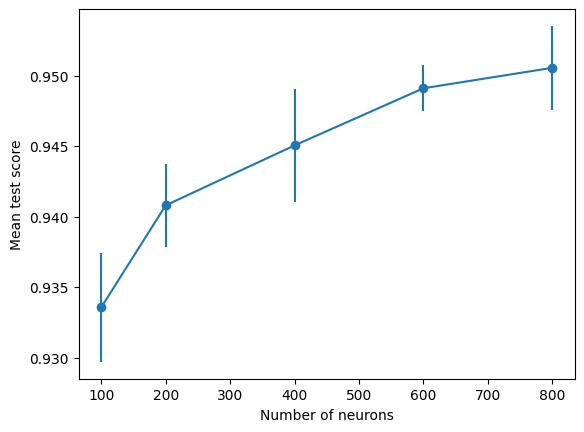

In [ ]:
plt.errorbar(n_neurons, means, yerr=stds, fmt='-o')
plt.xlabel('Number of neurons')
plt.ylabel('Mean test score')
plt.show()

## Creating CNNs with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. This approach neglects any spatial structure in the image. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [ ]:
# reshape data, depending on Keras backend
if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 28, 28, 1)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers. Luckily, all we need to do is change the architecture of our DNN.

![alt text](https://drive.google.com/uc?id=1ZQFqg-GCRKufS4mMGcluqBquv7yCPKlX)

After we instantiate the model, add the first convolutional layer with 10 filters, which is the dimensionality of output space. (https://keras.io/layers/convolutional/) Here, we will be concerned with local spatial filters
that take as inputs a small spatial patch of the
previous layer at all depths. We consider a three-dimensional kernel of size $5\times5\times1$. Check out this visualization of the
convolution procedure for a square input of unit depth: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
The convolution consists of running this filter over all locations
in the spatial plane. After computing the filter, the output is passed through
a non-linearity, a ReLU.

In [ ]:
from tensorflow.keras.models import Sequential # changed from tf.keras.models b/c wasn't working
from tensorflow.keras.layers import Dense, Dropout, Flatten # changed from tf.keras.layers b/c wasn't working
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

Subsequently, add a 2D pooling layer. (https://keras.io/layers/pooling/) This pooling layer coarse-grain spatial information by performing
a subsampling at each depth. Here, we use the the max pool operation. In a max pool, the spatial
dimensions are coarse-grained by replacing a small region
(say $2\times2$ neurons) by a single neuron whose output is the
maximum value of the output in the region.

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Add another convolutional layers with 20 filters and apply dropout. Then, add another pooling layer and flatten the data. You can do DNNs afterwards and compile the model.

In [ ]:
# add second convolutional layer with 20 filters
model.add(Conv2D(20, (5, 5), activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten data
model.add(Flatten())
# add a dense all-to-all relu layer
model.add(Dense(20*4*4, activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))
# soft-max layer
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])


Lastly, train your CNN and evaluate the model.

In [ ]:
# training parameters
batch_size = 64
epochs = 10


# train CNN
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
625/625 [==============================] - 9s 5ms/step - loss: 0.3250 - accuracy: 0.8958 - val_loss: 0.0986 - val_accuracy: 0.9788
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1030 - accuracy: 0.9678 - val_loss: 0.0593 - val_accuracy: 0.9842
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0777 - accuracy: 0.9761 - val_loss: 0.0506 - val_accuracy: 0.9868
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0665 - accuracy: 0.9801 - val_loss: 0.0458 - val_accuracy: 0.9871
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.0582 - accuracy: 0.9815 - val_loss: 0.0345 - val_accuracy: 0.9896
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0490 - accuracy: 0.9842 - val_loss: 0.0338 - val_accuracy: 0.9910
Epoch 

<span style="color:blue"> <i> 5. Do the grid search over any 3 different optimization schemes and 2 activation functions. Suppose that we have a 2 convolutional layers with 10 neurons. Let p_dropout = 0.5, epochs = 1, and batch_size = 64. Determine which combination of optimization scheme and activation function gives the best accuracy. </i></span> <br>

In [ ]:
def create_CNN(optimizer=tf.keras.optimizers.Adam(), activation='relu'):
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                 activation=activation,
                 input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Conv2D(10, (5, 5), activation=activation))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(model=create_CNN,
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the activation, see `compile_model()`
optimizer = ['SGD', 'Adam', 'Nadam']
activation = ['relu', 'tanh']
# define parameter dictionary
param_grid = dict(model__optimizer=optimizer, model__activation=activation)
# IMPORTANT: Note that the syntax to pass an argument to the create_DNN function requires
# model__ to be added before the parameter name.

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

625/625 [==============================] - 3s 5ms/step - loss: 0.3591 - accuracy: 0.8890


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960250 using {'model__activation': 'relu', 'model__optimizer': 'Adam'}
0.892600 (0.005458) with: {'model__activation': 'relu', 'model__optimizer': 'SGD'}
0.960250 (0.002324) with: {'model__activation': 'relu', 'model__optimizer': 'Adam'}
0.956975 (0.001424) with: {'model__activation': 'relu', 'model__optimizer': 'Nadam'}
0.894500 (0.002754) with: {'model__activation': 'tanh', 'model__optimizer': 'SGD'}
0.915300 (0.001751) with: {'model__activation': 'tanh', 'model__optimizer': 'Adam'}
0.917500 (0.005836) with: {'model__activation': 'tanh', 'model__optimizer': 'Nadam'}


<span style="color:blue"> <i> 6. Create an arbitrary DNN (you are free to choose any activation function, optimization scheme, etc) and evaluate its performance. Then, add two convolutional layers and pooling layers and evaluate its performance again. How do they compare? </i></span> <br>

In [ ]:
# define CNN
model = Sequential()
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy,
          optimizer=tf.keras.optimizers.Adam(),
          metrics=['accuracy'])

# training parameters
batch_size = 64
epochs = 1

# train CNN
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss (DNN):', score[0])
print('Test accuracy (DNN):', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1666 - accuracy: 0.9521

Test loss (DNN): 0.16663594543933868
Test accuracy (DNN): 0.9520999789237976


In [ ]:
# define CNN
model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5),
             activation='relu',
             input_shape=input_shape))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, (5, 5), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy,
          optimizer=tf.keras.optimizers.Adam(),
          metrics=['accuracy'])

# training parameters
batch_size = 64
epochs = 1

# train CNN
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss (CNN+DNN):', score[0])
print('Test accuracy (CNN+DNN):', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2832 - accuracy: 0.9722

Test loss (CNN+DNN): 0.2831777334213257
Test accuracy (CNN+DNN): 0.9721999764442444


The testing accuracy is higher for the DNN where we have added two convolutional and two pooling layers (even though the loss is slightly higher for that model, which demonstrates that there is not always a one-to-one correspondence between loss and accuracy in classification problems).

***